In [1]:
import pandas as pd
train = pd.read_csv(r'D:\BCI_data\2a csv\MI-EEG-A01E.csv', header=None).iloc[2, 9000:10000]

1、提取每一个通道数据，并保存为 1 个channel 1 行，长度为288000的csv数据
通道    
1   1-288                    0-1000
2    289-576            1000-2000
3   577-864             2000-3000
4   865-1152                 3-4
5   1153-1440               4-5
6   1441-1728               5-6
7   1729-2016               6-7
8   2017-2304   -  C3     7-8
9  2305-2592                8-9
10  2593-2880  -  CZ     9-10
11  2881-3168              10-11
12 3169-3456   -  C4    11-12
13 3457-3744                12-13
14  3745-4032               13-14
15  4033-4320               14-15
16  4321-4608               15-16
17 4609-4896                 16-17
18  4897-5184                 17-18
19 5185-5472                 18-19
20  5473-5760                19-20
21  5761-6048                 20-21
22  6049-6336                21-22

In [2]:
import numpy as np
a = np.array(train)
a.shape


(1000,)

(1000,)


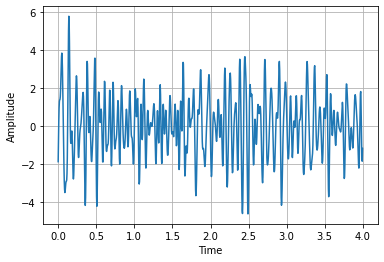

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import cv2

# 4 segundos con fs=250Hz
fs = 250
time = np.arange(0, 4, 1/fs)
sig = a
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [66]:
reshape_a = a.reshape(1,288000)
b=pd.DataFrame(reshape_a)
b.to_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c22-test.csv',index=None)


1.1 提取完22个文件数据，然后将22个文件依次合并为一个文件

In [67]:
import pandas as pd
a = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c1-test.csv')
b = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c2-test.csv')
c = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c3-test.csv')
d = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c4-test.csv')
e = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c5-test.csv')
f = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c6-test.csv')
g = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c7-test.csv')
h = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c8-test.csv')
r = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c9-test.csv')
g = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c10-test.csv')
k = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c11-test.csv')
l = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c12-test.csv')
m = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c13-test.csv')
n = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c14-test.csv')
o = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c15-test.csv')
p = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c16-test.csv')
q = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c17-test.csv')
R = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c18-test.csv')
s = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c19-test.csv')
t = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c20-test.csv')
u = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c21-test.csv')
v = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01-c22-test.csv')
P = pd.concat([a,b,c,d,e,f,g,h,r,g,k,l,m,n,o,p,q,R,s,t,u,v])


P.to_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01_channel22_test.csv',index=False, header=False)
print(P.shape)

(22, 288000)


2、得到2维数据，下面进行训练数据的预处理（x_train数据归一化，y_train标签的独热编码），然后依据数据的高度进行重塑为3维数据。


In [68]:
import pandas as pd
x_train = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01_channel22_train.csv', header=None)  #读取的时候一定要加上header，不加的话会将第一行作为header而shape少一行
print(x_train.shape)

(22, 288000)


2.1 得到重塑数据22的依据

In [70]:
n_samples_train = len(x_train)
print("n_samples_train:", n_samples_train)

n_samples_train: 22


2.2 缩放数据，使它们的均值 = 0，标准差 = 1（数据归一化）

In [71]:

from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler().fit(x_train)
# 定义一个新的train
x_train = scaler.transform(x_train)

In [1]:
import pandas as pd
y_train = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\EtiquetasA01T.csv')
print(y_train.shape)

(288, 1)


2.3 查看一下我们要做的是几分类工作，并且对标签进行编码

In [2]:
import numpy as np
n_classes = len(np.unique(y_train)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [3]:
#使用从 0 到 nClasses-1 的值对标签进行编码
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)


d:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [5]:
print(y_train)

[3 2 1 0 0 1 2 3 1 2 0 0 0 3 1 1 0 0 2 0 1 3 3 2 0 3 3 1 3 3 1 0 1 2 2 2 3
 2 0 3 1 2 1 2 3 1 2 0 0 0 3 1 0 2 0 2 1 3 0 2 2 0 2 1 3 3 3 2 0 3 1 3 1 0
 2 1 0 2 2 0 2 3 3 1 0 1 3 1 3 2 1 1 1 2 3 0 1 3 0 2 2 3 0 0 2 1 3 3 3 1 0
 2 1 3 0 3 2 1 3 3 0 1 1 2 3 1 0 0 3 1 0 2 1 1 2 0 3 2 2 2 2 0 1 0 1 0 0 2
 2 1 2 3 0 3 0 0 1 3 2 1 3 2 3 2 3 1 1 3 0 1 1 1 2 3 0 3 0 2 0 3 0 2 0 1 2
 2 3 0 1 3 1 2 2 0 3 1 3 0 0 2 2 1 3 1 1 0 1 3 3 1 1 1 1 3 3 2 3 0 1 2 1 0
 3 0 3 0 0 0 0 2 2 3 1 2 2 2 3 2 0 2 0 3 1 3 3 2 3 3 2 1 3 2 0 1 1 1 2 1 3
 2 3 1 2 0 3 0 2 3 0 2 0 1 1 0 3 0 3 2 2 0 2 1 1 0 2 0 1 0]


In [8]:
b=pd.DataFrame(y_train)
b.to_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01train22-Labelencoder.csv',index=None)

2.4 重塑数据为（22,288,1000）

In [76]:
x_train = x_train.reshape((n_samples_train, 288, 1000))

print(x_train.shape)

(22, 288, 1000)


3、保存新的数据以及标签

In [77]:
import torch
x_train_data = torch.save(x_train, "./A01_test_22channel.pt")

In [78]:
a = np.array(y_train)
b = pd.DataFrame(a)
label = b.to_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01_test_22label.csv',header=None)

In [80]:
import pandas as pd
z = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\mydata22\A01_test_22label.csv',header=None)
z.shape

(288, 1)

In [81]:
x = torch.save(z, "./A01_test_22label.pt")

In [85]:
import numpy as np
import torchvision.transforms as transforms
transf = transforms.ToTensor()


a = torch.load("./A01_test_22label.pt")
b = np.array(a)
c = transf(b)
c.shape

torch.Size([1, 288, 1])

In [86]:
torch.save(c,"./A01_test_22label.pt")

Train/Test 标签独热编码形式

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import numpy as np
import pandas as pd
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
x = pd.read_csv(r'C:\Users\19067\Desktop\2a csv\EtiquetasA01E.csv')

y = np.array(x)
y = y.reshape(-1,1)
encoder.fit(y)
y_oh = encoder.transform(y).toarray()

In [2]:
print(y_oh,y_oh.shape)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]] (288, 4)


In [3]:
import torch
import torchvision.transforms as transforms
transf = transforms.ToTensor()
d=transf(y_oh)
label = torch.argmax(d, dim=2).long()

In [4]:
print(label.shape)

torch.Size([1, 288])


In [6]:
import torch

a = torch.save(label,"./A01_test22_one_hot_label.pt")

数据输入错误，重新转换为（288,22,1000）的数据：为288个样本（矩阵），每1个矩阵shape是（22*1000）的包含22个通道的信号（变为一个多通道信号）

In [5]:
import torch
a = torch.load("./A01_test_22channel.pt")

In [6]:
a.shape

(288, 22, 1000)

In [7]:
b = a.reshape(288,22,125,8)
b.shape

(288, 22, 125, 8)

In [4]:
c = torch.save(b,"./A01_test_new125.pt")

In [14]:
import numpy as np
b = np.transpose(a, (1,0,2))
b.shape


(288, 22, 1000)

In [15]:
c = torch.save(b,"./A01_test_22channel.pt")

In [16]:
a = torch.load("./A01_test22_one_hot_label.pt")
a.shape

torch.Size([288, 1])

In [11]:
b = a.reshape(288,1)
print(b.shape)

torch.Size([288, 1])


In [10]:
c = torch.save(b,"./A01_test22_one_hot_label.pt")

构造每一类别数据为（72,22,1000）

In [27]:
import pandas as pd
train = pd.read_csv(r'C:\Users\19067\Desktop\2a\right.csv', header=None)

In [28]:
train.shape

(72, 22000)

In [29]:
n_samples_train = len(train)
print("n_samples_train:", n_samples_train)

n_samples_train: 72


In [30]:
import numpy as np
x_tongue =  np.array(train)
x_tongue = x_tongue.reshape((n_samples_train, 22, 1000))

print(x_tongue.shape)

(72, 22, 1000)


In [31]:
import torch
c = torch.save(x_tongue,"./A01_right.pt")

In [32]:
a = torch.load("./A01_right.pt")
a.shape

(72, 22, 1000)